# Plotting the Separating Hyperplane of an SVM in 3D with Matplotlib

https://www.semipol.de/posts/2015/10/plotting-the-separating-hyperplane-of-an-svm-in-3d-with-matplotlib/3Dsvm-small_hu6c2287fa1cddd8bd614ed9b8880daacc_42629_860x300_fill_box_smart1_2.png

source: https://www.semipol.de/posts/2015/10/plotting-the-separating-hyperplane-of-an-svm-in-3d-with-matplotlib/ 

Text by author:
" I have been struggling how to plot the separating hyperplane of an SVM (a One-class SVM in my case) in a 3D space using matplotlib. There was no apparent way how to convert the decision function output into something that one of the 3D plotting functions could deal with. Fortunately I found a solution which I am going to share in case someone wants to do the same.

The solution is based on sampling the 3D space and computing a distance to the separating hyperplane for each sample. Afterwards, I derived the isosurface at distance 0 using the marching cubes implementation in scikit-image. The resulting mesh can be plotted using existing methods in matplotlib. This is an example of this technique (based on the 2D example for the One-class SVM in scikit-learn): 

In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from sklearn import svm
import matplotlib.font_manager
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

SPACE_SAMPLING_POINTS = 100
TRAIN_POINTS = 100

# Define the size of the space which is interesting for the example
X_MIN = -5
X_MAX = 5
Y_MIN = -5
Y_MAX = 5
Z_MIN = -5
Z_MAX = 5

# Generate a regular grid to sample the 3D space for various operations later
xx, yy, zz = np.meshgrid(np.linspace(X_MIN, X_MAX, SPACE_SAMPLING_POINTS),
                         np.linspace(Y_MIN, Y_MAX, SPACE_SAMPLING_POINTS),
                         np.linspace(Z_MIN, Z_MAX, SPACE_SAMPLING_POINTS))

# Generate training data by using a random cluster and copying it to various
# places in the space
X = 0.3 * np.random.randn(TRAIN_POINTS, 3)
X_train = np.r_[X + 2, X - 2, X + [2, 2, 0]]

# Generate some regular novel observations using the same method and
# distribution properties
X = 0.3 * np.random.randn(20, 3)
X_test = np.r_[X + 2, X - 2, X + [2, 2, 0]]

# Generate some abnormal novel observations using a different distribution
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 3))


In [4]:
### OWN STUFF ###
print(X_train)

[[ 1.98881104e+00  2.12496789e+00  1.84557506e+00]
 [ 1.92382249e+00  1.94415290e+00  2.30605070e+00]
 [ 1.46478667e+00  1.93679481e+00  1.08523690e+00]
 [ 1.65421806e+00  2.13701277e+00  2.07440486e+00]
 [ 2.48655166e+00  2.27324515e+00  1.94228319e+00]
 [ 2.05532378e+00  1.83477161e+00  2.01788482e+00]
 [ 2.16805956e+00  2.22178205e+00  1.52082632e+00]
 [ 2.01897795e+00  1.62347529e+00  2.28589953e+00]
 [ 2.47553970e+00  1.36923159e+00  1.90596876e+00]
 [ 2.16449173e+00  1.68664772e+00  1.86422590e+00]
 [ 2.40735242e+00  2.12878279e+00  1.91937706e+00]
 [ 2.00020965e+00  1.70147170e+00  2.10021176e+00]
 [ 1.71436154e+00  2.02618835e+00  1.79121348e+00]
 [ 2.20787000e+00  2.27039396e+00  2.20765178e+00]
 [ 1.75906593e+00  2.01156781e+00  2.38416850e+00]
 [ 1.26739377e+00  1.88472847e+00  2.17159185e+00]
 [ 2.05067052e+00  1.74581200e+00  1.78627081e+00]
 [ 1.59719093e+00  1.96274243e+00  2.08722874e+00]
 [ 2.27942671e+00  2.09833201e+00  2.36994559e+00]
 [ 2.03436351e+00  1.97052105e+

In [2]:
# Create a OneClassSVM instance and fit it to the data
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Predict the class of the various input created before
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# And compute classification error frequencies
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Calculate the distance from the separating hyperplane of the SVM for the
# whole space using the grid defined in the beginning
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

In [3]:
### OWN STUFF ###
clf.n_features_in_

3

/var/folders/2x/_czh2l1x4sd_pgz7n5rvj4p80000gn/T/ipykernel_5768/1975874840.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


AttributeError: module 'skimage.measure' has no attribute 'marching_cubes'

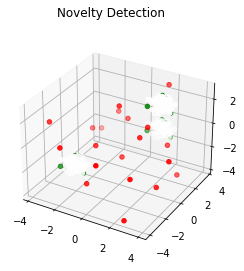

In [6]:
# Create a figure with axes for 3D plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.suptitle("Novelty Detection")

# Plot the different input points using 3D scatter plotting
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='white')
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='green')
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], X_outliers[:, 2], c='red')

# Plot the separating hyperplane by recreating the isosurface for the distance
# == 0 level in the distance grid computed through the decision function of the
# SVM. This is done using the marching cubes algorithm implementation from
# scikit-image.
verts, faces = measure.marching_cubes(Z, 0)
# Scale and transform to actual size of the interesting volume
verts = verts * \
    [X_MAX - X_MIN, Y_MAX - Y_MIN, Z_MAX - Z_MIN] / SPACE_SAMPLING_POINTS
verts = verts + [X_MIN, Y_MIN, Z_MIN]
# and create a mesh to display
mesh = Poly3DCollection(verts[faces],
                        facecolor='orange', edgecolor='gray', alpha=0.3)
ax.add_collection3d(mesh)

# Some presentation tweaks
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_zlim((-5, 5))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend([mpatches.Patch(color='orange', alpha=0.3), b1, b2, c],
          ["learned frontier", "training observations",
           "new regular observations", "new abnormal observations"],
          loc="lower left",
          prop=matplotlib.font_manager.FontProperties(size=11))
ax.set_title(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
fig.show()